In [35]:
import sys
sys.path.append('../../')
import krylov.utils.loader as loader
from krylov.methods import Methods,np
# import loader as loader
# from methods import Methods

In [36]:
# length = int(sys.argv[1])
length = 1081
version = 'EFG'
directory = 'data'
Methods.epsilon = 1e-8

In [37]:
A = loader.matrixLoader(directory,version,length)
b = loader.vectorLoader(directory,version,length)

In [76]:
kskips = []
adaptives = []
ks = [8,10]

In [77]:
for k in ks:
    kskip = Methods(A,b)
    kskip.kskipmrr(k=k)
    
    adaptive = Methods(A,b)
    adaptive.adaptivekskipmrr(k=k)
    
    kskips.append(kskipmrr)
    adaptives.append(adaptive)

--------------------
name:k-skip MrR
Status: converged
iter: 548 times
initial_k: 8
final_k: None
residual: 9.799943388246541e-09
time: 3.2742841243743896
--------------------
--------------------
name:adaptive k-skip MrR
Status: converged
iter: 222 times
initial_k: 8
final_k: 7
residual: 9.496309037753619e-09
time: 1.0581412315368652
--------------------
--------------------
name:k-skip MrR
Status: Diverged
time: 7.283262014389038
--------------------
--------------------
name:adaptive k-skip MrR
Status: converged
iter: 239 times
initial_k: 10
final_k: 8
residual: 9.785056754453015e-09
time: 1.5975651741027832
--------------------


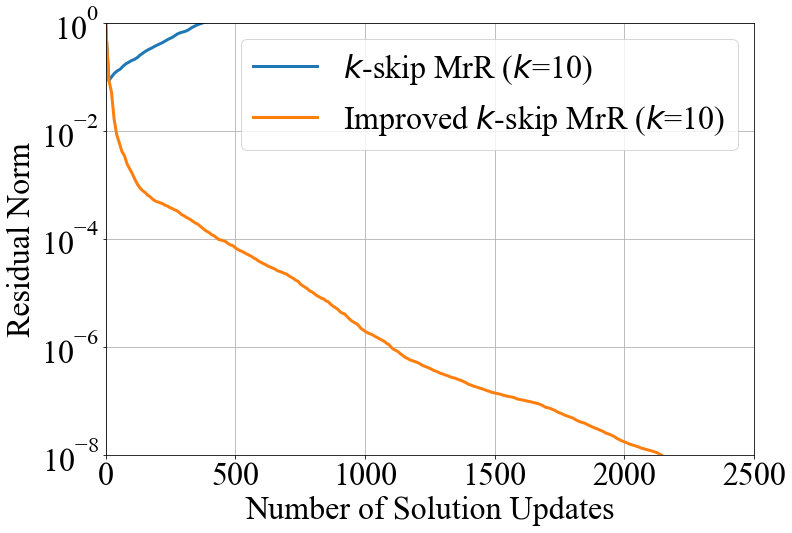

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
for i in range(1,2):
    d = kskips[i]
    plt.plot(d.solution_updates[:d.iter],d.residual[:d.iter],lw=3,label='$k$-skip MrR' + ' ($k$={0})'.format(ks[i]))
    d = adaptives[i]
    plt.plot(d.solution_updates[:d.iter],d.residual[:d.iter],lw=3,label='Improved $k$-skip MrR' + ' ($k$={0})'.format(ks[i]))
plt.legend()
plt.yscale('log')
plt.xlim(0,2500)
plt.ylim(1e-8,1)
plt.xlabel('Number of Solution Updates')
plt.ylabel('Residual Norm')
plt.subplots_adjust(left=0.15, right=0.90, bottom=0.15, top=0.90)
plt.grid()
plt.show()

In [95]:
fig.savefig('intermediate_announcement/comparing_kskip_adaptive.png')

In [33]:
res = np.array(mrr.residual)

In [34]:
res.min()

4.137451977181866e-08